# 🌍 [예시 주제] 지진은 어디에서 자주 발생할까?(예시)

USGS(미국 지질조사국) 데이터를 이용해 **아시아 지역의 지진 분포**를 시각화하고, 
**지진 규모의 빈도**를 분석하는 실습 과제입니다.

## 🧭 실습 목표
(여러분들의 아이디어를 추가)
- 전 세계 지진 데이터 중 아시아 지역(위도 20~50, 경도 120~150)을 필터링
- 지도에 지진 위치 표시 (folium)
- 지진 규모의 분포를 히스토그램으로 시각화 (seaborn)


In [7]:
# 필요한 라이브러리 불러오기
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# 🌐 지진 데이터 불러오기 (7일간 규모 1.0 이상)
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week.csv"
df = pd.read_csv(url)
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-06-12T13:18:11.141Z,63.592600,-147.276900,0.00,1.20,ml,NaN,NaN,NaN,0.90,...,2025-06-12T13:20:54.622Z,"82 km ESE of Denali Park, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
1,2025-06-12T13:01:33.869Z,60.254700,-152.052700,15.10,1.40,ml,NaN,NaN,NaN,1.18,...,2025-06-12T13:03:43.171Z,"31 km NW of Ninilchik, Alaska",earthquake,NaN,1.10,NaN,NaN,automatic,ak,ak
2,2025-06-12T12:51:09.270Z,38.830666,-122.820168,1.80,1.32,md,26.0,50.0,0.01072,0.02,...,2025-06-12T12:52:43.339Z,"8 km NNW of The Geysers, CA",earthquake,0.18,0.33,0.11,26.0,automatic,nc,nc
3,2025-06-12T12:50:23.260Z,38.831165,-122.819832,1.71,1.05,md,20.0,58.0,0.01088,0.02,...,2025-06-12T12:51:58.343Z,"8 km NNW of The Geysers, CA",earthquake,0.22,0.37,0.12,21.0,automatic,nc,nc
4,2025-06-12T12:49:53.660Z,38.831665,-122.820335,1.77,1.14,md,19.0,53.0,0.01151,0.03,...,2025-06-12T12:51:28.567Z,"8 km NNW of The Geysers, CA",earthquake,0.22,0.42,0.17,21.0,automatic,nc,nc


In [9]:
mask_main = (
    (df['latitude']  >= 51)  & (df['latitude']  <= 72) &
    (df['longitude'] >= -170) & (df['longitude'] <= -129)
)
alaska = df[mask_main].copy()
print(f"▶ 알래스카 지역 지진 건수: {len(alaska)}")

▶ 알래스카 지역 지진 건수: 319


In [10]:
# 지도 위에 지진 위치 시각화 (folium)
m = folium.Map(location=[64, -152], zoom_start=4, tiles="CartoDB positron")

for _, row in alaska.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['mag'] * 1.3,                           # 규모에 비례한 원 크기
        color='red'   if row['mag'] >= 5 else
              'orange' if row['mag'] >= 3 else
              'green',
        fill=True,
        fill_opacity=0.6,
        popup=f"M{row['mag']} • {row['place']}"
    ).add_to(m)

m.save("alaska_earthquakes.html")
print("✅ 지진 지도: 'alaska_earthquakes.html' 생성 완료")

✅ 지진 지도: 'alaska_earthquakes.html' 생성 완료


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN})

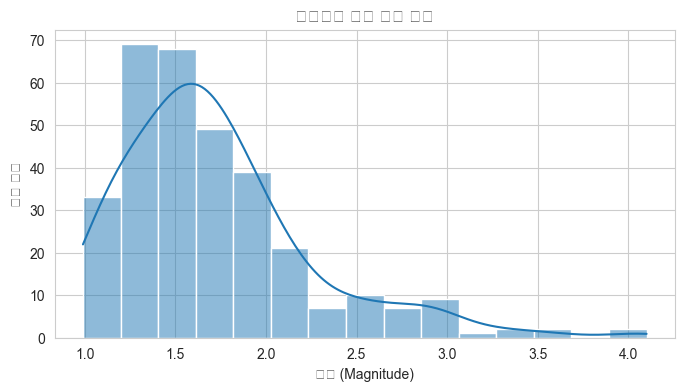

In [11]:
# 📊 지진 규모 분포 시각화 (히스토그램)
sns.set_style("whitegrid")
plt.figure(figsize=(8,4))
sns.histplot(alaska['mag'], bins=15, kde=True)
plt.title("알래스카 지진 규모 분포")
plt.xlabel("규모 (Magnitude)")
plt.ylabel("발생 빈도")
plt.show()

## 📝 자유 탐구 추가 아이디어
- 다른 지역(예: 칠레, 알래스카 등)으로 필터링 조건을 바꿔 비교
- 지진이 자주 일어난 위치만 클러스터
- 규모가 큰 지진만 따로 표시하는 지도 생성
- `folium.Popup()`을 사용해 각 지진의 위치에 설명을 추가